In [3]:
import numpy as np
import pandas as pd
import nltk

#VIZ
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cmocean

sns.set_style('darkgrid')
sns.set_palette('twilight')

In [7]:
#read in data labels
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

#quick function to give info on column
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])
    
#test
feat_info('mort_acc')
    

Number of mortgage accounts.


In [195]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [9]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Exploratory Data Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

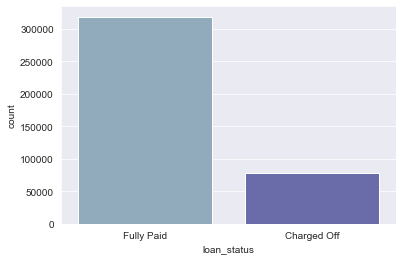

In [11]:
sns.countplot(x='loan_status',data=df)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

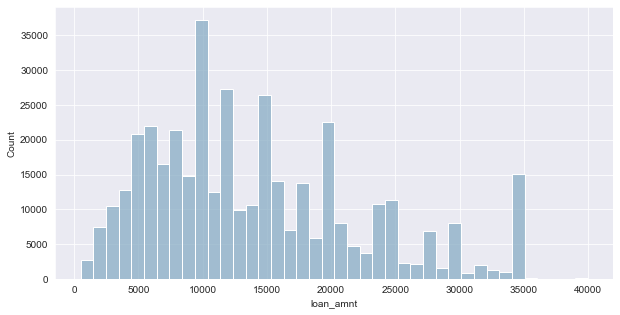

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(x='loan_amnt',data=df,bins=40)

#looks like a chi-squared or F with a 10+ DOF
#spikes on multiple of 5000

<AxesSubplot:>

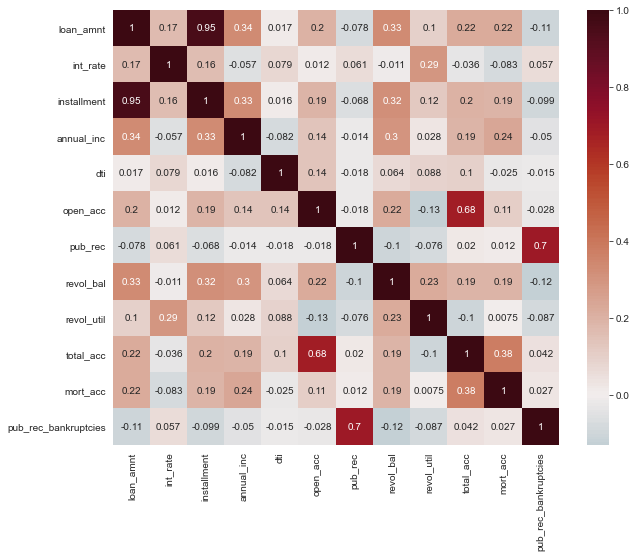

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap=cmocean.cm.balance,center=0)


#near 1 between loan_amnt and installment. Sensible, as higher total requires higher 
#    installments over a given time frame. 
#    Will examine further

#total and open accounts are correlated as well, not surprising

#also public records ro bankruptcies. Could be something, but I wouldn't be surprised 
#    if there's just overlap here

In [32]:
feat_info('loan_amnt')
feat_info('installment')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
The monthly payment owed by the borrower if the loan originates.


<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

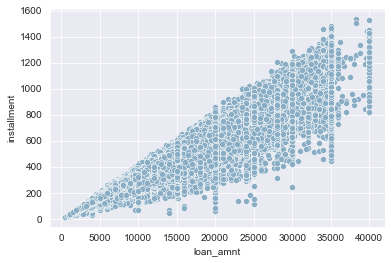

In [33]:
sns.scatterplot(x='loan_amnt',y='installment',data=df)

#likely duplicate information. installment*loan time = loan amount for non-defaults.

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

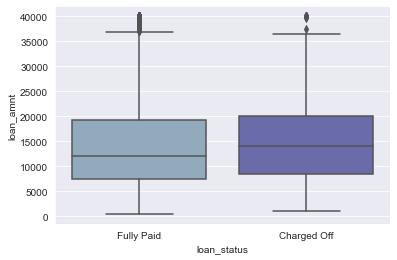

In [35]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

#defaults were slightly higher on most levels, but overall there is not much of a difference between the two

In [36]:
df.groupby('loan_status').describe()

#nothing surprising here, backs up the boxplot info

loan_amnt                                                      \
                count          mean          std     min     25%      50%   
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                               int_rate             ... mort_acc        \
                 75%      max     count       mean  ...      75%   max   
loan_status                                         ...                  
Charged Off  20000.0  40000.0   77673.0  15.882587  ...      2.0  23.0   
Fully Paid   19225.0  40000.0  318357.0  13.092105  ...      3.0  34.0   

            pub_rec_bankruptcies                                               
                           count      mean       std  min  25%  50%  75%  max  
loan_status                                                                    
Charged Off              77586.0  0.128412  0.368853  0.0  0.0  0.0  0.0  8.0  
Fully Paid              317909.0  0.119997  0.352992  0.0  0.0  0.0  0.0  8.0  

[2 rows x 96 columns]

In [47]:
#time to look at grades

sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [48]:
sorted(df['sub_grade'].unique())

#df['sub_grade'].nunique()
#so we've got A-G and 1-5 for each of those. total of 35 options

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

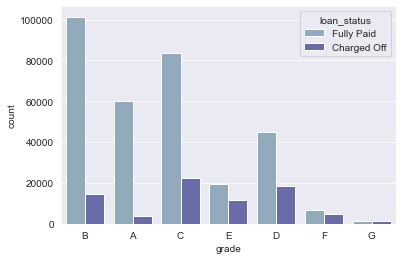

In [51]:
sns.countplot(x='grade',hue='loan_status',data=df)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

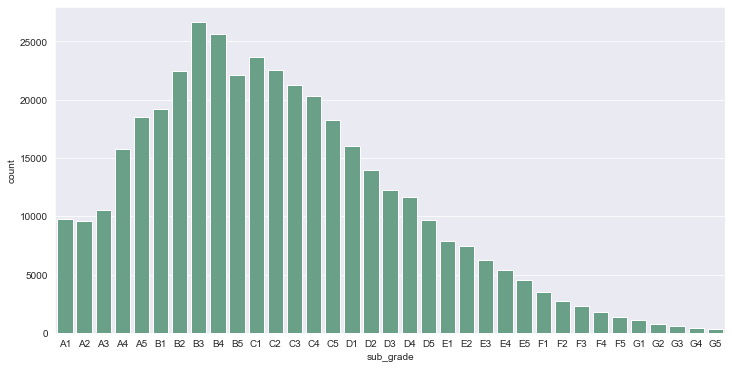

In [67]:
plt.figure(figsize=(12,6))
sns.countplot(x     = 'sub_grade',
              data  = df,
              order = sorted(df['sub_grade'].unique()),
              color  = cmocean.cm.tempo(100))

#again we have that chi-squared, left bias distribution

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

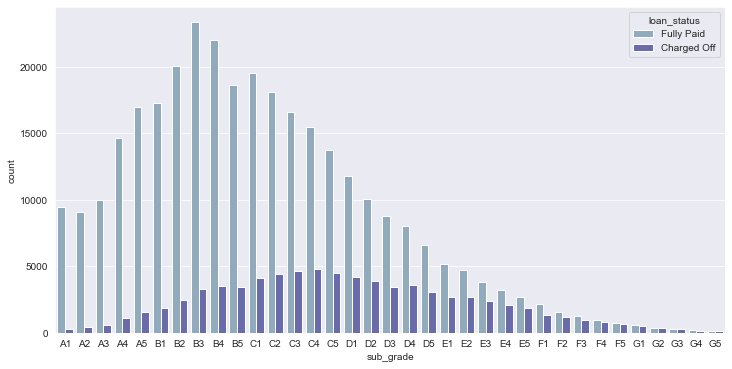

In [68]:
plt.figure(figsize=(12,6))
sns.countplot(x     = 'sub_grade',
              hue   = 'loan_status',
              data  = df,
              order = sorted(df['sub_grade'].unique()))

#okay, so paid and charged have very different distributions by subgrade.

#lower grades get paid off much less often

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

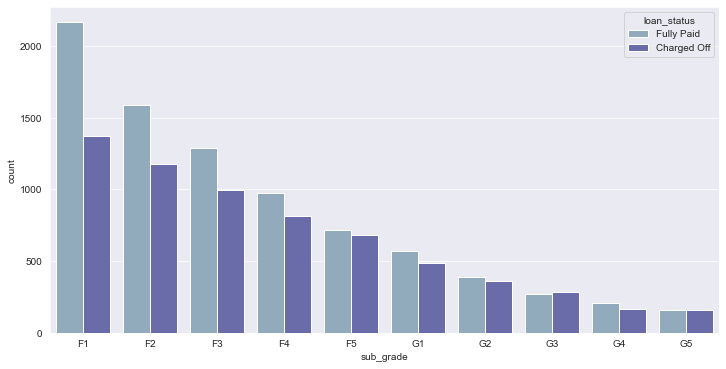

In [70]:
plt.figure(figsize=(12,6))
sns.countplot(x     = 'sub_grade',
              hue   = 'loan_status',
              data  = df[(df['grade'] == 'F') | (df['grade'] == 'G')],
              order = sorted(df[(df['grade'] == 'F') | (df['grade'] == 'G')]['sub_grade'].unique()))

#oof, g is effectively a toss-up between paid off or not. f is almost as bad. And considering the number 
#    of total paid off vs charged. yikes.

In [71]:
#changed status into dummy variable 1 or 0
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

<AxesSubplot:>

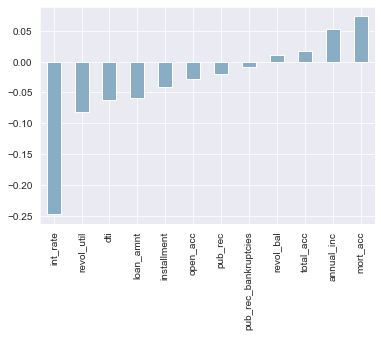

In [82]:
df.corr()['loan_repaid'].drop('loan_repaid').sort_values().plot(kind='bar')

#interest rate is by far the most correlated. High interest rates lead to charges, unsurprisingly

# PreProcessing

In [83]:
#time to get rid of useless stuff, engineer some new thing, switch into dummy variables
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


term into numerical

subgrades into linearly spaced values

drop grades

emp_title needs to go into something

emp_length into numerical

home_ownership into dummies

initial_list_status into dummies

application type into dummies or drop

address probably drop

In [95]:
print(len(df),'total entries')

396030 total entries


In [141]:
#100/len(df)*df.isnull().sum()

#only show those with missing for clarity
df.isnull().sum().loc[(df.isnull().sum() != 0)]/len(df)*100

#employment data and mort_acc are missing a lot
#title missing some
#revol_util and pub_rec_bankruptcies missing a little

title                   0.443148
revol_util              0.069692
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
dtype: float64

In [117]:
feat_info('emp_title')
print()
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [118]:
df['emp_title'].nunique()

#that's a lot of unique titles. something definitely needs to happen here

173105

In [123]:
df['emp_title'].value_counts()

#some of these aren't actual job title, just companies?

Teacher                             4389
Manager                             4250
Registered Nurse                    1856
RN                                  1846
Supervisor                          1830
                                    ... 
MANG                                   1
education                              1
automation clerk                       1
Fox Sports Net                         1
902d Military Intelligence Group       1
Name: emp_title, Length: 173105, dtype: int64

In [126]:
#getting rid of emp titles
df.drop('emp_title',axis=1,inplace=True)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

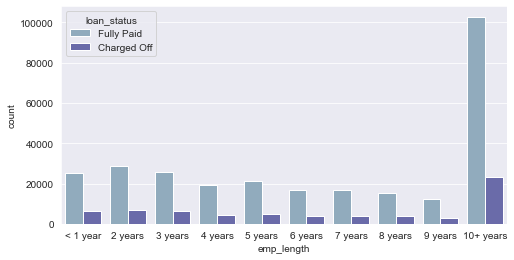

In [133]:
length_vals_order = [
               '< 1 year',
               '2 years',
               '3 years',
               '4 years',
               '5 years',
               '6 years',
               '7 years',
               '8 years',
               '9 years',
               '10+ years',]


plt.figure(figsize=(8,4))
sns.countplot(x     = 'emp_length',
              data  = df, 
              order = length_vals_order,
              hue   = 'loan_status'
             )

#most are 10+, not shocking since that has a ton of different options

#not huge variation between years

In [136]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
emp_len = emp_co/emp_fp

In [137]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

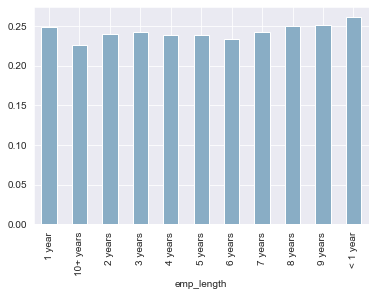

In [138]:
emp_len.plot(kind='bar')

#unsurprisingly, very similar overall. time to drop

In [139]:
#get rid of emp_length
df.drop('emp_length',axis=1,inplace=True)

In [140]:
#check what's still missing

df.isnull().sum().loc[(df.isnull().sum() != 0)]

title                    1755
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [143]:
#compare title to purpose, might have duplicate info

df[['title','purpose']].head()

#yup, duplicate information. can drop title

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card


In [144]:
df.drop('title',axis=1,inplace=True)

In [147]:
#new for mort_acc. lots missing here (~10%)

feat_info('mort_acc')

Number of mortgage accounts.


In [148]:
df['mort_acc'].value_counts()

#who has 34 mortgages???

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [150]:
print('correlation with mortgage accounts')

df.corr()['mort_acc'].sort_values()

#total accounts has highest corr, unsurprisingly.

correlation with mortgage accounts


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [153]:
print('Average mortgages for total accounts')

df.groupby('total_acc').mean()['mort_acc']

Average mortgages for total accounts


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [159]:
#fill mort acc nans with the averages from above
df2 = df.copy(deep=True)


In [163]:
mort_avgs = df.groupby('total_acc').mean()['mort_acc']

In [164]:
def fill_missing_mort(total_acc,mort_acc):
    
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN ; if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    
    if np.isnan(mort_acc):
        return mort_avgs[total_acc]
    else:
        return mort_acc

In [166]:
df['mort_acc'] = df.apply(lambda x: fill_missing_mort(x['total_acc'], x['mort_acc']), axis=1)

In [173]:
def check_missing(df):
    '''
    Checks if there are any missing values in a dataframe.
    If there are, returns the number of missing points for each variable missing data.
    '''
    
    miss = df.isnull().sum().loc[(df.isnull().sum() != 0)]
    
    if miss.empty:
        return('No Missing Data')
    else:
        return miss

In [168]:
check_missing(df)

revol_util              276
pub_rec_bankruptcies    535
dtype: int64

In [169]:
#few enough points left missing that we can just remove those rows without impacting the dataset too much

df.dropna(axis=0,inplace=True)

In [174]:
check_missing(df)

'No Missing Data'

## time for dummies

In [180]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [198]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

### change term to be numerical months

In [212]:

df['term'] = df['term'].map({' 36 months':36,' 60 months':60})

### drop grade

In [185]:

df.drop('grade',axis = 1,inplace = True)

### turn subgrade into dummies

In [186]:

dummy_subgrade = pd.get_dummies(df['sub_grade'],drop_first=True)

In [189]:
df = pd.concat([df.drop('sub_grade',axis=1),dummy_subgrade],axis=1)

In [213]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0


In [214]:
df.select_dtypes('object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [217]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [224]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

### dummies for home ownership, but integrate none and any to other

In [255]:

df['home_ownership'] = df['home_ownership'].replace({'NONE':'OTHER','ANY':'OTHER'})

In [256]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [257]:
#unsure why drop_first doesnt work here
dummy_home = pd.get_dummies(df['home_ownership'])
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummy_home],axis=1)

In [258]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,MORTGAGE,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,0,0,1,0,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,0,0,0,0,0,1,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,0,0,0,0,1,0,0,0


### deal with addresses

In [264]:
df['zipcode'] = df['address'].apply(lambda address: address[-5:])

In [269]:
dummy_zip = pd.get_dummies(df['zipcode'])
df = df.drop('zipcode',axis=1)
df = pd.concat([df,dummy_zip],axis=1)

In [272]:
df = df.drop('address',axis=1)

### issue date

wouldn't exist for predicting a new loan, drop it

In [275]:
df.drop(['issue_d'],axis=1,inplace=True)

### earliest credit

In [276]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [280]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda cr_date: int(cr_date[-4:]))

In [285]:
df.drop(['earliest_cr_line','loan_status'],axis=1,inplace=True)

# Time to make a model

### split

In [298]:
from sklearn.model_selection import train_test_split

In [292]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### normalize

In [295]:
from sklearn.preprocessing import MinMaxScaler

In [296]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### model setup

In [299]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [333]:
model = Sequential()


# input layer
model.add(Dense(81,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [334]:
model.fit(x = X_train, 
          y = y_train, 
          epochs = 25,
          batch_size = 256,
          validation_data = (X_test, y_test), 
          )

Epoch 1/25
1035/1035 [==============================] - 2s 2ms/step - loss: 0.2964 - val_loss: 0.2619
Epoch 2/25
1035/1035 [==============================] - 2s 2ms/step - loss: 0.2660 - val_loss: 0.2604
Epoch 3/25
1035/1035 [==============================] - 2s 2ms/step - loss: 0.2639 - val_loss: 0.2600
Epoch 4/25
1035/1035 [==============================] - 2s 2ms/step - loss: 0.2630 - val_loss: 0.2598
Epoch 5/25
1035/1035 [==============================] - 2s 2ms/step - loss: 0.2616 - val_loss: 0.2593
Epoch 6/25
1035/1035 [==============================] - 2s 2ms/step - loss: 0.2611 - val_loss: 0.2589
Epoch 7/25
1035/1035 [==============================] - 2s 2ms/step - loss: 0.2609 - val_loss: 0.2591
Epoch 8/25
1035/1035 [==============================] - 2s 2ms/step - loss: 0.2603 - val_loss: 0.2594
Epoch 9/25
1035/1035 [==============================] - 2s 2ms/step - loss: 0.2601 - val_loss: 0.2591
Epoch 10/25
1035/1035 [==============================] - 2s 2ms/step - loss: 0.259

### save model

In [4]:
from tensorflow.keras.models import load_model

In [304]:
model.save('full_data_project_model_mjf.h5')  

In [5]:
load_model('full_data_project_model_mjf.h5')

# Model performance

In [321]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

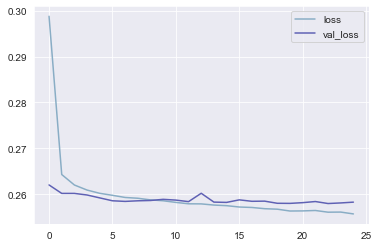

In [322]:
losses[['loss','val_loss']].plot()

In [307]:
from sklearn.metrics import classification_report,confusion_matrix

In [323]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.46      0.62     25480
           1       0.88      0.99      0.93    104943

    accuracy                           0.89    130423
   macro avg       0.91      0.73      0.78    130423
weighted avg       0.89      0.89      0.87    130423



In [324]:
confusion_matrix(y_test,predictions)

array([[ 11659,  13821],
       [   720, 104223]], dtype=int64)

In [312]:
df.shape

(395219, 81)

# Pruning

In [330]:
import tensorflow_model_optimization as tfmot

In [335]:
# Helper function uses `prune_low_magnitude` to make only the 
# Dense layers train with pruning.
def apply_pruning_to_dense(layer):
  if isinstance(layer, tf.keras.layers.Dense):
    return tfmot.sparsity.keras.prune_low_magnitude(layer)
  return layer

# Use `tf.keras.models.clone_model` to apply `apply_pruning_to_dense` 
# to the layers of the model.
model_for_pruning = tf.keras.models.clone_model(
    model,
    clone_function=apply_pruning_to_dense,
)

model_for_pruning.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_dense_12 (None, 81)                13043     
_________________________________________________________________
dropout_8 (Dropout)          (None, 81)                0         
_________________________________________________________________
prune_low_magnitude_dense_13 (None, 39)                6359      
_________________________________________________________________
dropout_9 (Dropout)          (None, 39)                0         
_________________________________________________________________
prune_low_magnitude_dense_14 (None, 19)                1503      
_________________________________________________________________
dropout_10 (Dropout)         (None, 19)                0         
_________________________________________________________________
prune_low_magnitude_dense_15 (None, 1)                

In [336]:
predictions = (model_for_pruning.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.44      0.61     25480
           1       0.88      1.00      0.94    104943

    accuracy                           0.89    130423
   macro avg       0.92      0.72      0.77    130423
weighted avg       0.90      0.89      0.87    130423



In [337]:
confusion_matrix(y_test,predictions)

array([[ 11333,  14147],
       [   362, 104581]], dtype=int64)

In [1]:
losses = pd.DataFrame(model_for_pruning.history.history)
losses[['loss','val_loss']].plot()

NameError: name 'pd' is not defined

### check

In [338]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 80, dtype: float64

In [342]:
model.predict_classes(new_customer.values.reshape(1,80))

array([[1]])

In [343]:
df.iloc[random_ind]['loan_repaid']

1.0